In [775]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

In [776]:
datafile = 'ex1data2.txt'
col= np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
X=np.transpose(col[0:2])
y=np.transpose(col[2:])


In [777]:
def featureNormalize(X):
    X_norm=X
    for i in range (X.shape[1]):
        mu=np.mean(X[:,i])
        sigma= np.std(X[:,i],ddof=1)
#         print(mu ,sigma)
        X_norm[:,i]= np.divide((X[:,i]-mu),sigma)

    
    return X_norm
        

In [778]:
X = featureNormalize(X)

In [779]:
X = np.insert(X,0,1,axis=1)

In [780]:
alpha = 0.1
num_iters = 100

In [781]:
theta= np.zeros((3,1))

In [782]:
def computeCostMulti(X, y, theta):
    m = y.size
    J = 0
    for i in range(m):
        J=J + np.divide(1,(2*m))*np.power(np.matmul(np.transpose(theta),np.transpose(X[i,:]))-y[i],2)
    return J

In [783]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m= y.size
    k= theta.shape[0]
    J_history=np.zeros(num_iters)
    for iters in range(num_iters):
        theta_temp=np.zeros((3,1))
        for i in range(k):
            diff= np.multiply((np.matmul(X , theta) - y) ,(X[:,i]).reshape((m,1)))
            theta_temp[i] = theta[i] - ((alpha/m) * np.sum(diff))
        
        theta= theta_temp
        J_history[iters]= computeCostMulti(X,y,theta)
    return theta, J_history

In [784]:
t=gradientDescentMulti(X, y, theta, alpha, num_iters)

In [785]:
t

(array([[ 340403.6177],
        [ 109912.6785],
        [  -5931.1091]]),
 array([  5.3294e+10,   4.3427e+10,   3.5500e+10,   2.9123e+10,
          2.3987e+10,   1.9846e+10,   1.6504e+10,   1.3803e+10,
          1.1620e+10,   9.8517e+09,   8.4192e+09,   7.2573e+09,
          6.3139e+09,   5.5472e+09,   4.9234e+09,   4.4154e+09,
          4.0011e+09,   3.6628e+09,   3.3862e+09,   3.1597e+09,
          2.9740e+09,   2.8215e+09,   2.6959e+09,   2.5924e+09,
          2.5068e+09,   2.4360e+09,   2.3772e+09,   2.3282e+09,
          2.2874e+09,   2.2531e+09,   2.2244e+09,   2.2002e+09,
          2.1797e+09,   2.1624e+09,   2.1476e+09,   2.1349e+09,
          2.1241e+09,   2.1148e+09,   2.1067e+09,   2.0997e+09,
          2.0936e+09,   2.0883e+09,   2.0836e+09,   2.0795e+09,
          2.0759e+09,   2.0727e+09,   2.0698e+09,   2.0673e+09,
          2.0650e+09,   2.0630e+09,   2.0611e+09,   2.0595e+09,
          2.0580e+09,   2.0567e+09,   2.0555e+09,   2.0544e+09,
          2.0534e+09,   2.0525

In [786]:
theta=t[0]
J_history= t[1]

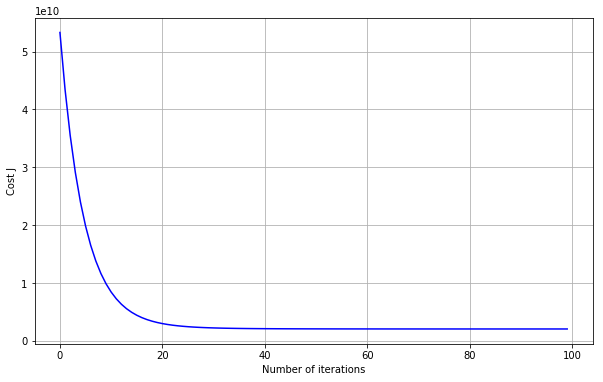

In [835]:
plt.figure(figsize=(10,6))
plt.plot(J_history,'b-',markersize=10)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.grid(True) #Always plot.grid true!

In [788]:
print('Theta computed from gradient descent: \n')
print(theta)

Theta computed from gradient descent: 

[[ 340403.6177]
 [ 109912.6785]
 [  -5931.1091]]


In [789]:
price = 0; 
price = np.matmul([1, 1650, 3] , theta)

In [790]:
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):', price[0]);

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 181678529.797


In [791]:
datafile = 'ex1data2.txt'
col= np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
X=np.transpose(col[0:2])
y=np.transpose(col[2:])
X = np.insert(X,0,1,axis=1)

In [792]:
def normalEqn(X,y):
    theta= np.zeros((X.shape[1],1))
    theta =  np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(X),X)),np.transpose(X)),y)
    return theta

In [793]:
theta = normalEqn(X,y)

In [794]:
print('Theta computed from the normal equations: \n',theta)

Theta computed from the normal equations: 
 [[ 89597.9095]
 [   139.2107]
 [ -8738.0191]]


In [795]:
price = 0
price = np.matmul([1, 1650, 3] ,theta)

In [796]:
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):', price[0]);

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 293081.464335
